How well do jobs and skills pay for data analyst (salary analysis for data analyst jobs)

Methodology:

1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [18]:
#import all the necessary libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

#load the dataset
datatset=load_dataset('lukebarousse/data_jobs')
df=datatset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [19]:
#now we will create a df which contains all job titles specifically in the us and drop all the na values from the salary_year_avg col
df_US=df[(df['job_country']=='United States')].dropna(subset=['salary_year_avg'])

In [20]:
#well get the top 6 jobs_titles 
#we will access the job_title_short col from our df and apply the value counts method and we only need the top 6 titles(index not values)
#it will give us an array therefore convert it into a list
job_titles=df_US['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [21]:
#we will filter it more out
#create a new df which contains only the job_titles which are present in the job_titles list
#we will access the job_title_short col and check if the jobs are in the job_title list
df_US_top6=df_US[df_US['job_title_short'].isin(job_titles)]
df_US_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [22]:
#we will perform a groupby aggregation to find out the different median salaries for different job_titles
#first we will apply the groupby method on the job_title_short col , all the same jobs are grouped together
#like data analyst data science data analsyt.. so all data analyst jobs together all data science jobs together
#after grouping by all the same job_titles together we will access the salary_year_avg for each and apply the median method
#so we will calculate the median salary_year_avg for all the grouped together job_titles
#first groupby same job titles together then access the salary_year_avg col and apply the  median method to get the median salary for the job titles
#we need to sort in descending order and we dont care what the count is we just need the index(job titles) in descending order of their median salary
#this is a series that we created
job_order=df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index


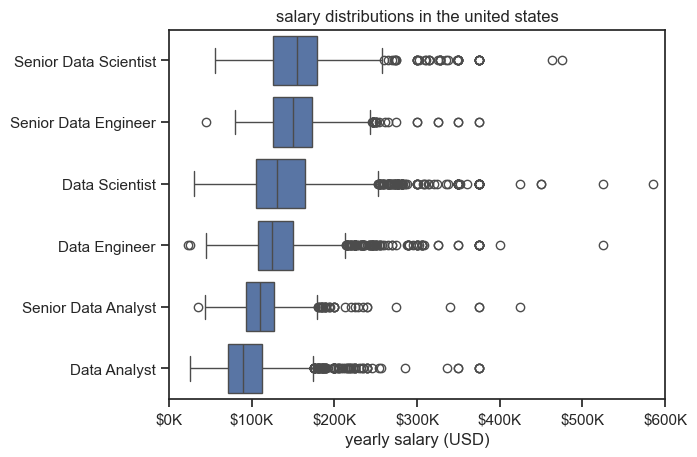

In [ ]:
#now well plot this using boxplot in seaborn
sns.boxplot(data=df_US_top6, x='salary_year_avg',y='job_title_short',order=job_order)
sns.set_theme(style='ticks')

plt.title('salary distributions in the united states')
plt.xlabel('yearly salary (USD)')
plt.ylabel('')
plt.xlim(0,600000)
#funcformatter is used to reset labels using the lambda function; for every y divide it by 1000 to remove the decimal places and put a $before and K after and everything inside an f string
ticks_x=plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [24]:
''' 
Think of plt.FuncFormatter as a machine that you give a specific rule for re-labeling numbers. The rule you give it is the lambda function.

Now, let's look at the rule: lambda y, pos: f'${int(y/1000)}K'

This is a tiny, simple function. You can read it like this:

"For every number y that needs a label, do the following: Take y, divide it by 1000, drop the decimals, and put a $ sign in front and a K at the end."
'''

' \nThink of plt.FuncFormatter as a machine that you give a specific rule for re-labeling numbers. The rule you give it is the lambda function.\n\nNow, let\'s look at the rule: lambda y, pos: f\'${int(y/1000)}K\'\n\nThis is a tiny, simple function. You can read it like this:\n\n"For every number y that needs a label, do the following: Take y, divide it by 1000, drop the decimals, and put a $ sign in front and a K at the end."\n'